# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [2]:
len(df)

14723

In [3]:
df['State'].value_counts()

CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
WY      31
ND      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64

In [4]:
df_texas = df[df['State']=='TX']
df_texas

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,91640,76941,Mertzon,TX,San Angelo,Irion,14373,NaN,NaN,NaN,...,122500,121800,121600,122200,123500,124700,124300,122600,121600,121600
14472,92897,79313,Anton,TX,Levelland,Hockley,14473,NaN,NaN,NaN,...,55400,56300,55700,56300,58900,61500,63000,63600,63500,63300
14492,92921,79355,Plains,TX,NaN,Yoakum,14493,NaN,NaN,NaN,...,100500,100500,101000,100700,99700,97700,95800,94600,94000,93500
14599,92929,79366,Ransom Canyon,TX,Lubbock,Lubbock,14600,134500.0,134500.0,134400.0,...,252100,251600,251600,251500,251300,251500,251700,252500,255000,257500


In [5]:
print('number of counties: ' + str(len(df_texas['CountyName'].unique())))
df_texas_counties = df_texas['CountyName'].unique()
df_texas_counties_num_zips = df_texas['CountyName'].value_counts()
df_texas_counties_num_zips

number of counties: 174


Harris        121
Dallas         70
Tarrant        59
Bexar          55
Travis         45
             ... 
Hutchinson      1
Maverick        1
Crosby          1
Madison         1
Gillespie       1
Name: CountyName, Length: 174, dtype: int64

In [6]:
print('number of metro areas: ' + str(len(df_texas['Metro'].unique())))
df_texas_metros = df_texas['Metro'].unique()
df_texas['Metro'].value_counts()

number of metro areas: 61


Dallas-Fort Worth    217
Houston              187
San Antonio           78
Austin                73
Corpus Christi        22
Beaumont              21
El Paso               21
Killeen               19
Waco                  16
Lubbock               15
Tyler                 15
Wichita Falls         12
Athens                11
Abilene               11
Longview              11
McAllen               11
College Station       11
Amarillo              11
Brownsville           10
Texarkana              7
Odessa                 6
Marshall               6
San Angelo             5
Victoria               5
Laredo                 4
Huntsville             4
El Campo               4
Midland                4
Brenham                3
Corsicana              3
Palestine              3
Port Lavaca            3
Brownwood              3
Nacogdoches            3
Bay City               3
Levelland              2
Rio Grande City        2
Plainview              2
Paris                  2
Dumas                  2


In [7]:
def prep_data(data_frame, to_drop_list):
    import pandas as pd
    data_frames = []
    for i in range(0, len(data_frame)):
        one_data_frame = pd.DataFrame()
        one_data_frame['Price'] = data_frame.iloc[i,:]
        print(str(i+1) + ' of ' + str(len(data_frame)) + ' parsed')
        zip_code = one_data_frame.loc['RegionName']
        one_data_frame = one_data_frame.drop(to_drop_list)
        one_data_frame.plot(title=int(zip_code))
        data_frames.append(one_data_frame)
    return data_frames

1 of 2 parsed
2 of 2 parsed


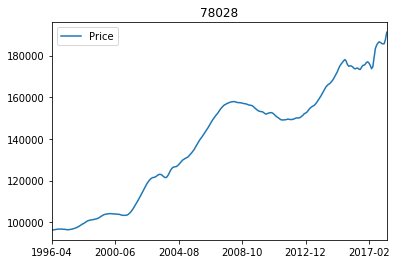

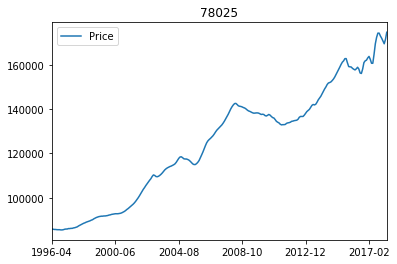

In [8]:
to_drop = ['RegionID', 'City', 'State', 'RegionName', 'Metro', 'CountyName', 'SizeRank']
kerr = prep_data(df_texas[df_texas['CountyName']=='Kerr'], to_drop)

1 of 121 parsed
2 of 121 parsed
3 of 121 parsed
4 of 121 parsed
5 of 121 parsed
6 of 121 parsed
7 of 121 parsed
8 of 121 parsed
9 of 121 parsed
10 of 121 parsed
11 of 121 parsed
12 of 121 parsed
13 of 121 parsed
14 of 121 parsed
15 of 121 parsed
16 of 121 parsed
17 of 121 parsed
18 of 121 parsed
19 of 121 parsed
20 of 121 parsed
21 of 121 parsed
22 of 121 parsed
23 of 121 parsed
24 of 121 parsed
25 of 121 parsed


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


26 of 121 parsed
27 of 121 parsed
28 of 121 parsed
29 of 121 parsed
30 of 121 parsed
31 of 121 parsed
32 of 121 parsed
33 of 121 parsed
34 of 121 parsed
35 of 121 parsed
36 of 121 parsed
37 of 121 parsed
38 of 121 parsed
39 of 121 parsed
40 of 121 parsed
41 of 121 parsed
42 of 121 parsed
43 of 121 parsed
44 of 121 parsed
45 of 121 parsed
46 of 121 parsed
47 of 121 parsed
48 of 121 parsed
49 of 121 parsed
50 of 121 parsed
51 of 121 parsed
52 of 121 parsed
53 of 121 parsed
54 of 121 parsed
55 of 121 parsed
56 of 121 parsed
57 of 121 parsed
58 of 121 parsed
59 of 121 parsed
60 of 121 parsed
61 of 121 parsed
62 of 121 parsed
63 of 121 parsed
64 of 121 parsed
65 of 121 parsed
66 of 121 parsed
67 of 121 parsed
68 of 121 parsed
69 of 121 parsed
70 of 121 parsed
71 of 121 parsed
72 of 121 parsed
73 of 121 parsed
74 of 121 parsed
75 of 121 parsed
76 of 121 parsed
77 of 121 parsed
78 of 121 parsed
79 of 121 parsed
80 of 121 parsed
81 of 121 parsed
82 of 121 parsed
83 of 121 parsed
84 of 121 pars

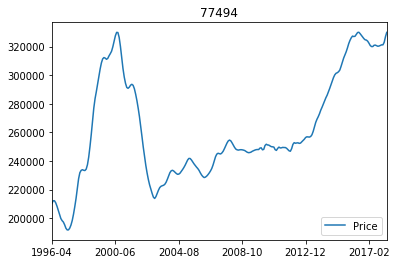

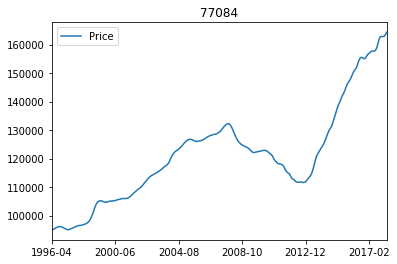

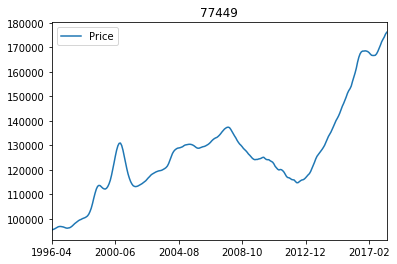

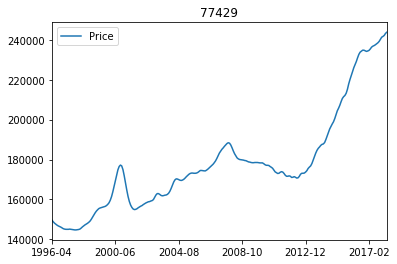

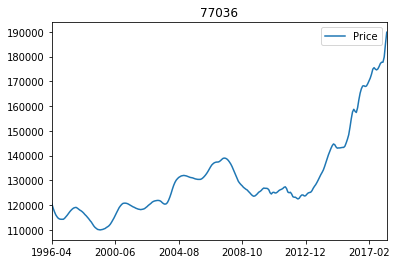

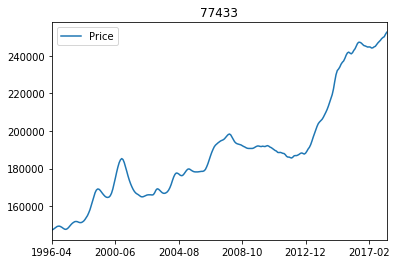

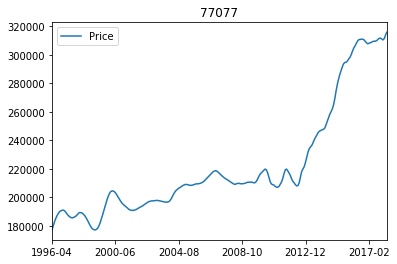

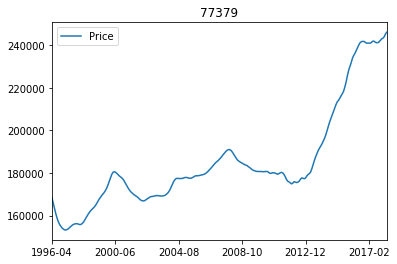

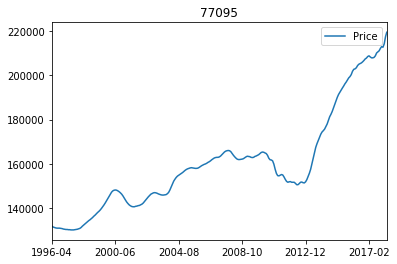

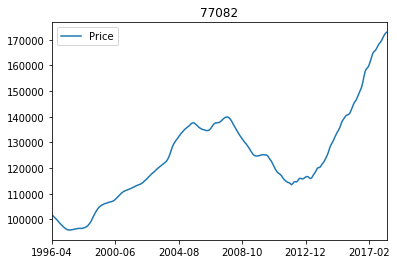

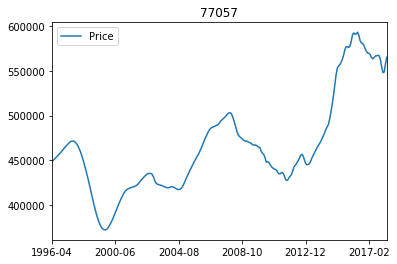

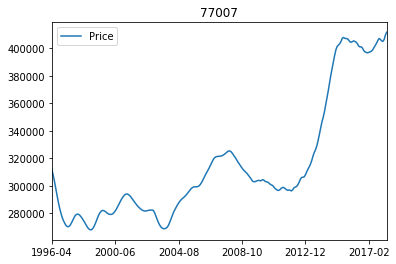

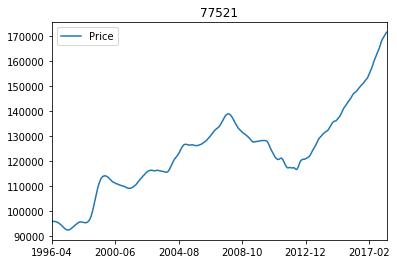

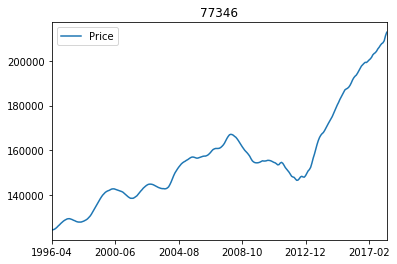

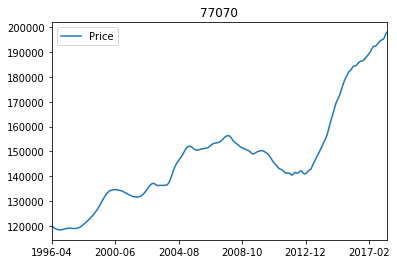

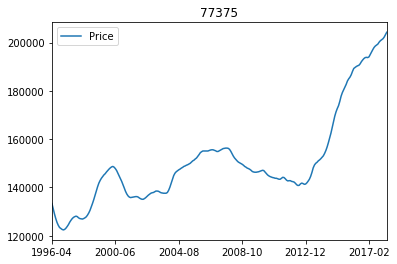

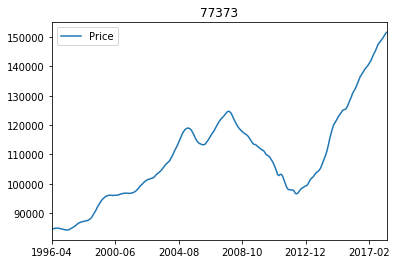

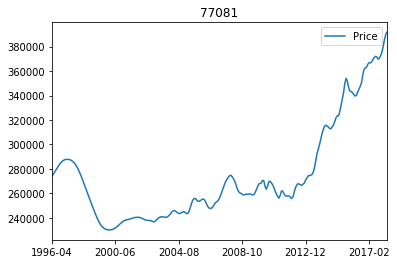

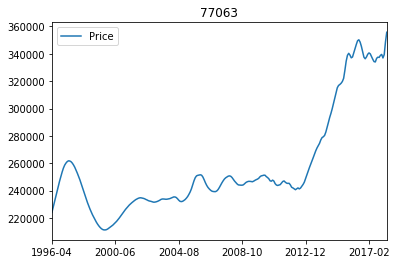

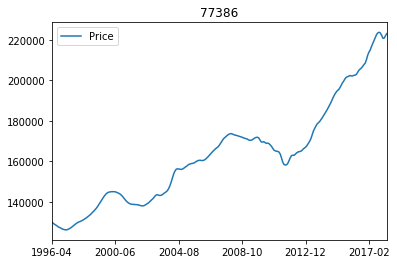

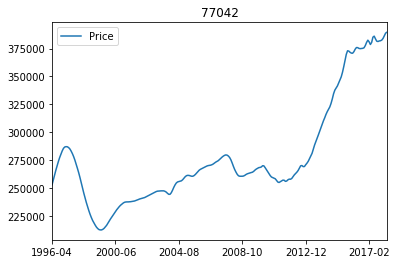

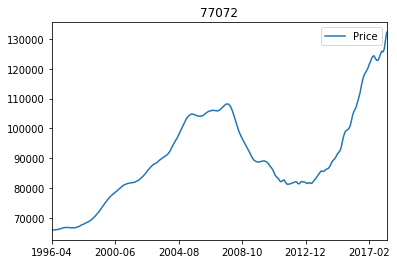

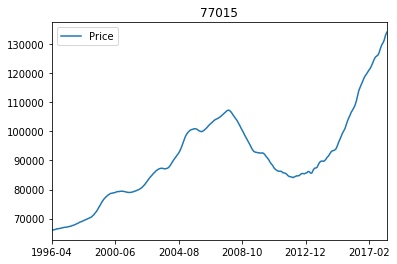

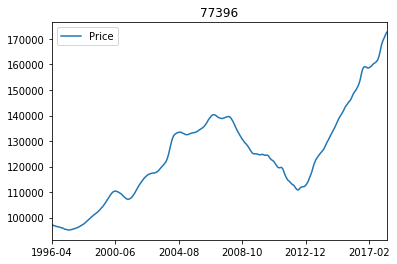

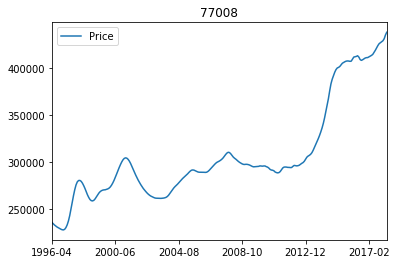

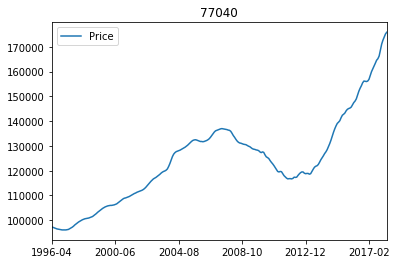

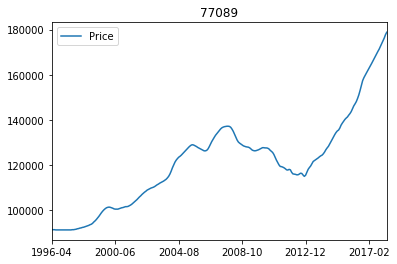

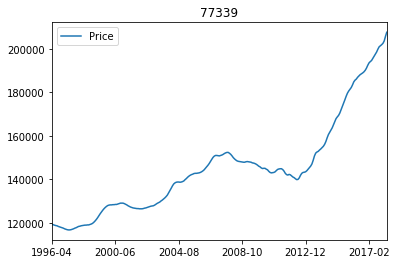

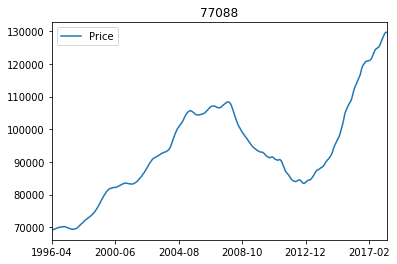

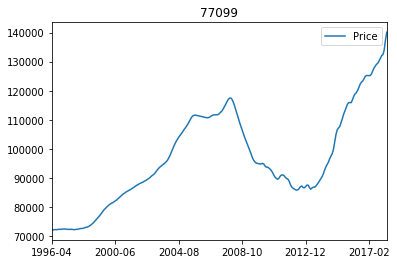

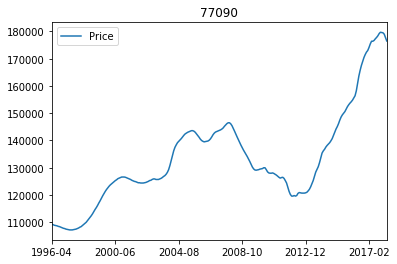

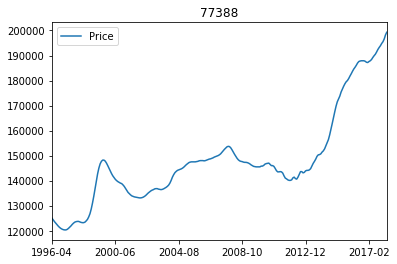

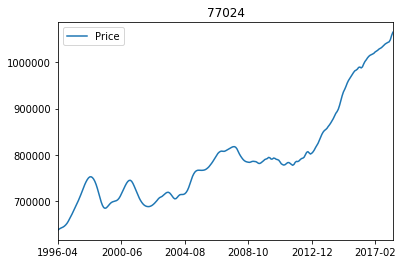

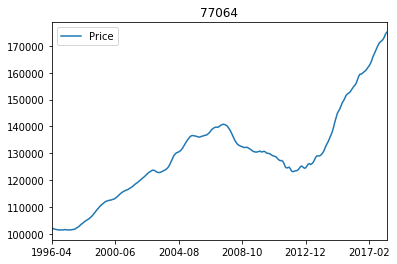

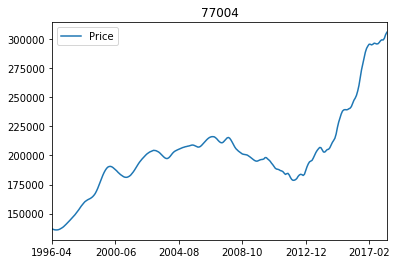

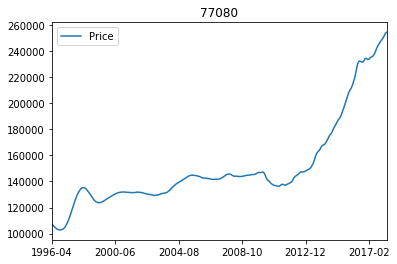

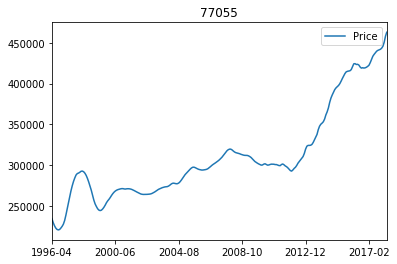

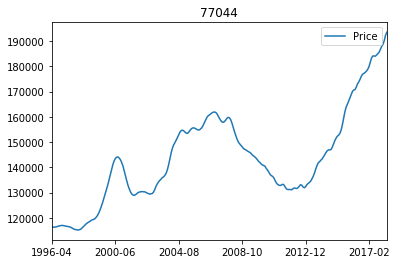

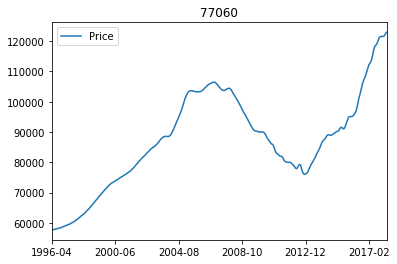

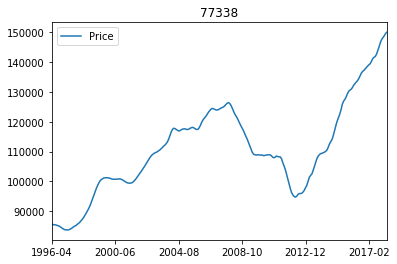

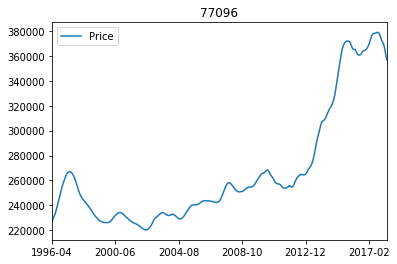

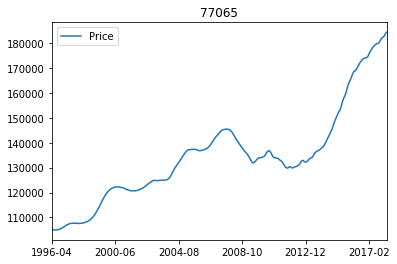

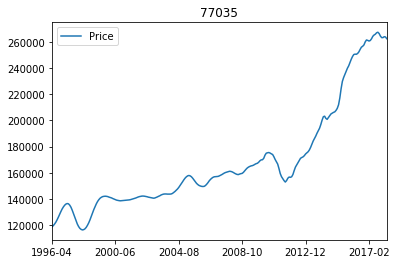

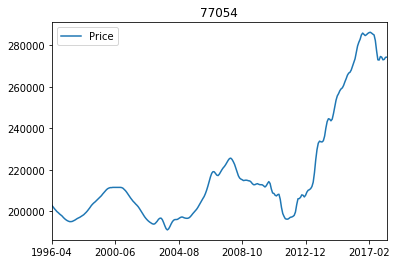

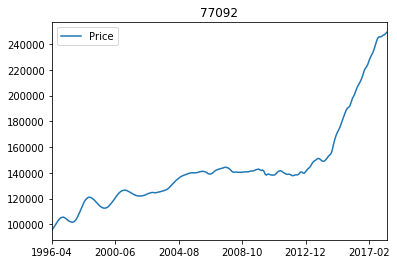

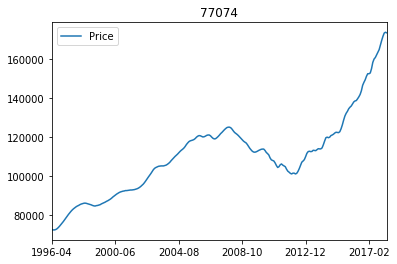

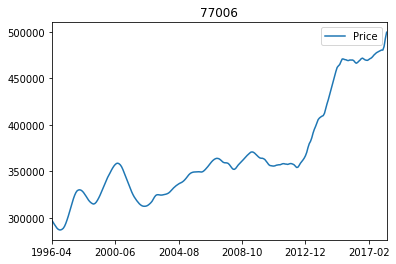

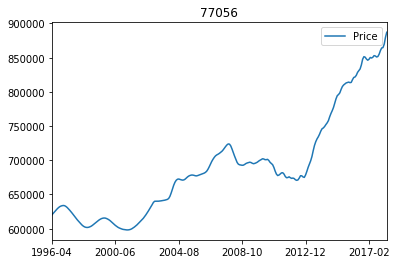

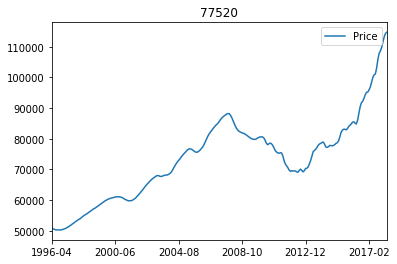

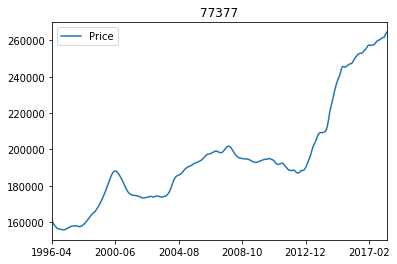

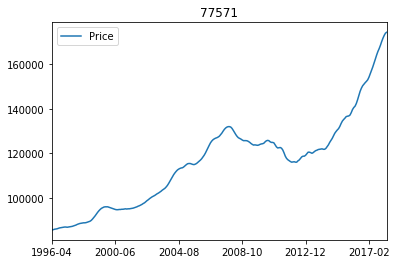

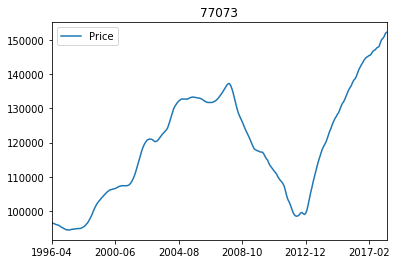

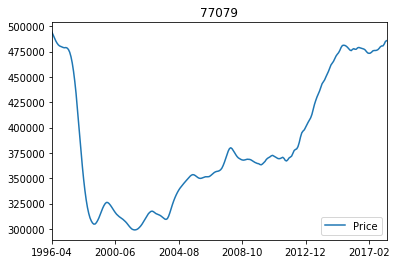

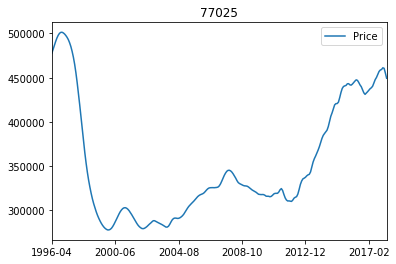

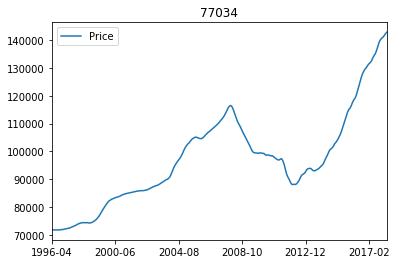

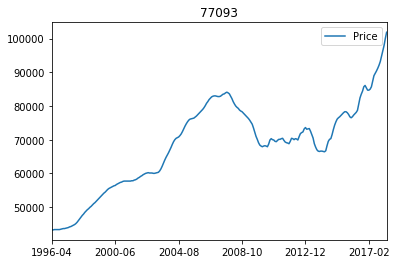

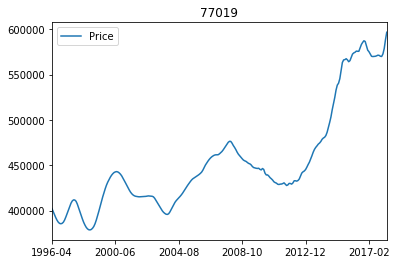

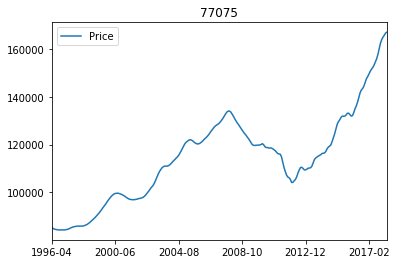

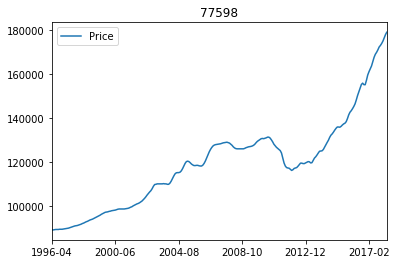

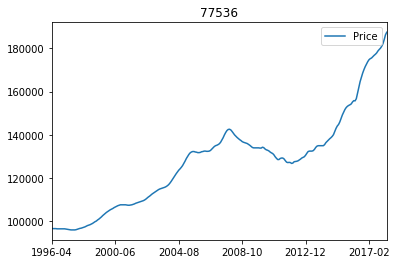

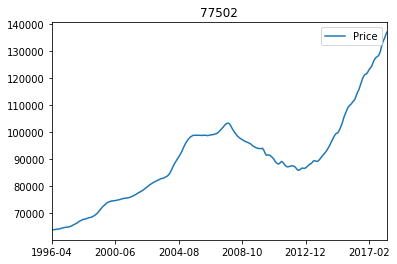

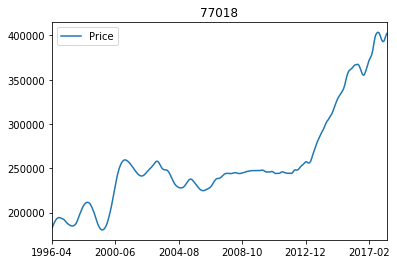

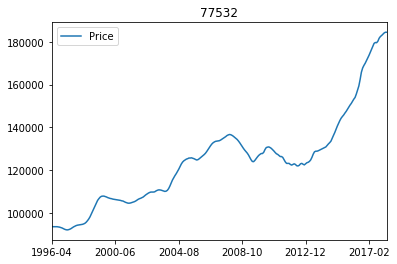

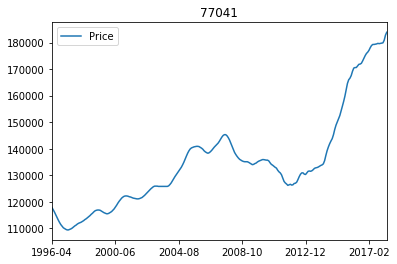

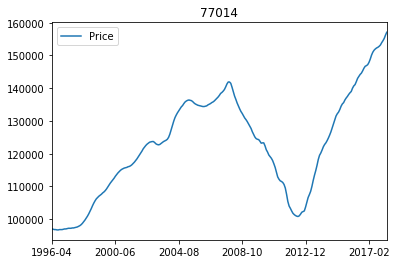

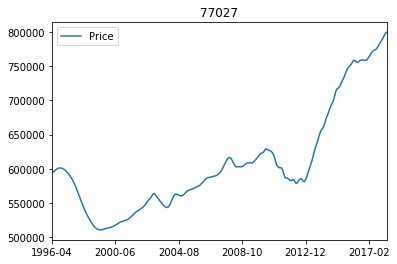

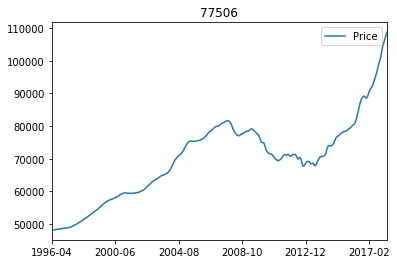

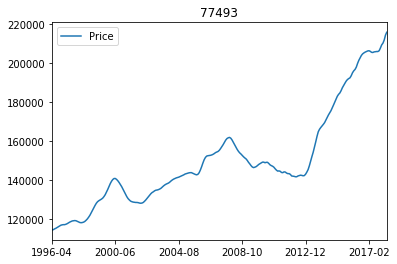

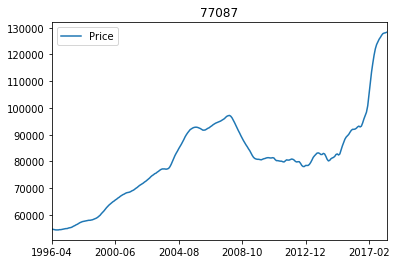

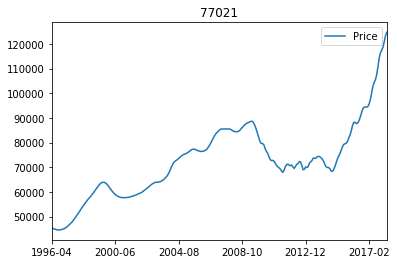

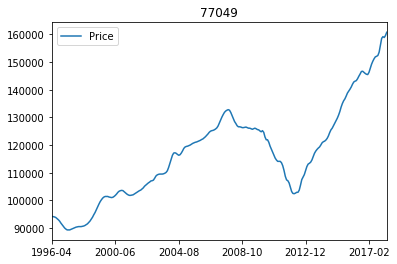

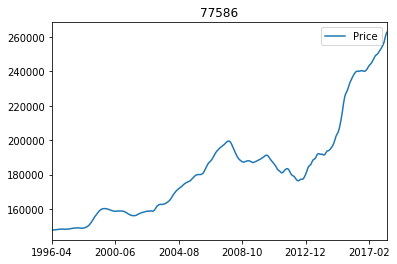

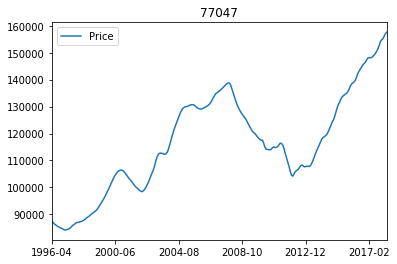

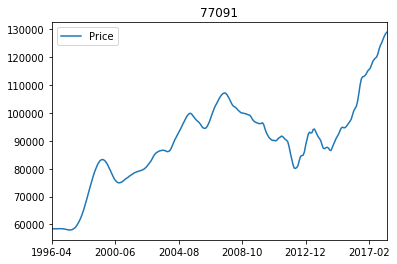

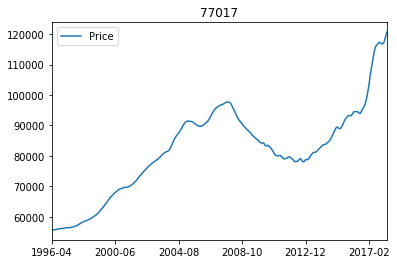

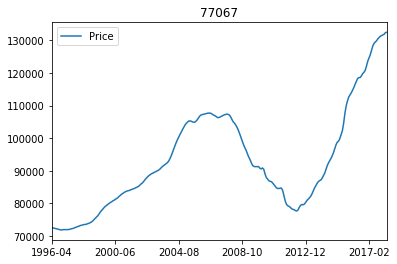

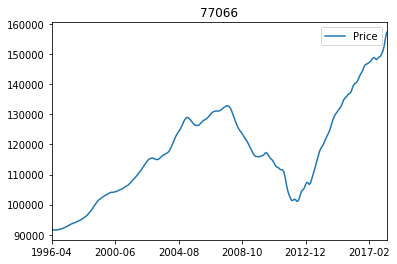

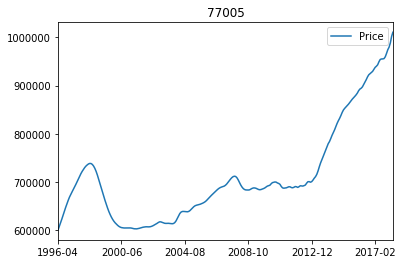

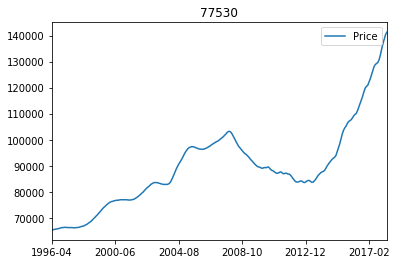

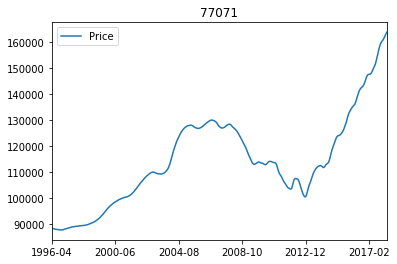

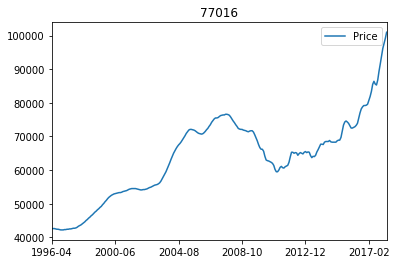

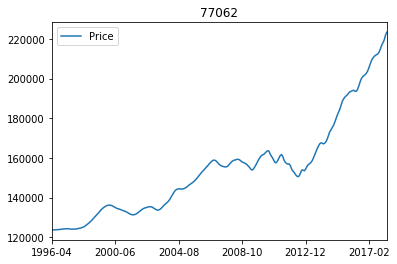

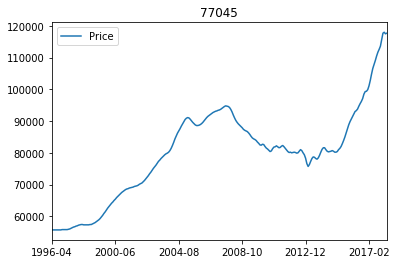

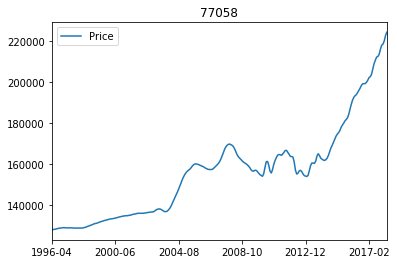

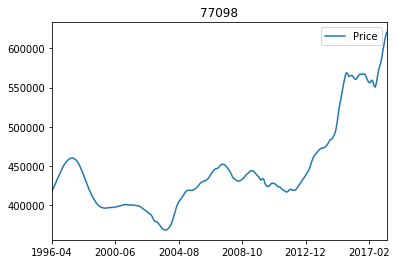

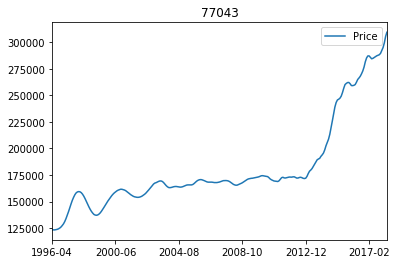

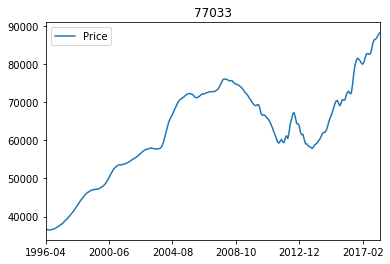

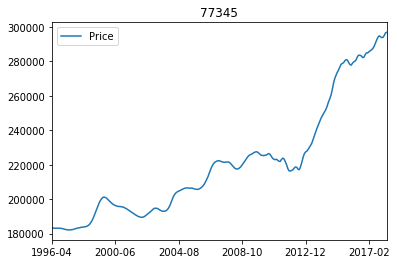

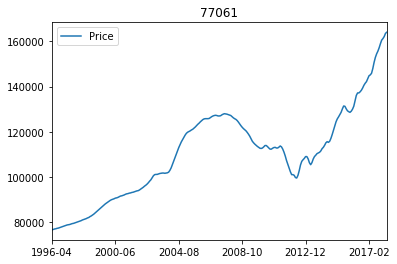

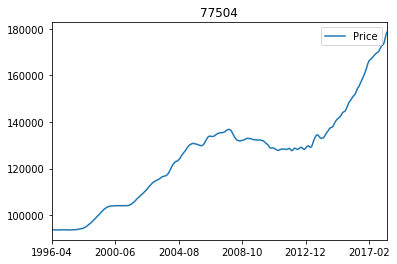

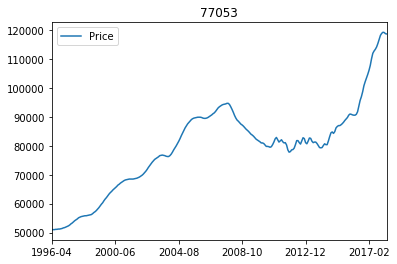

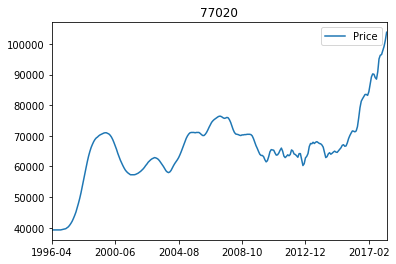

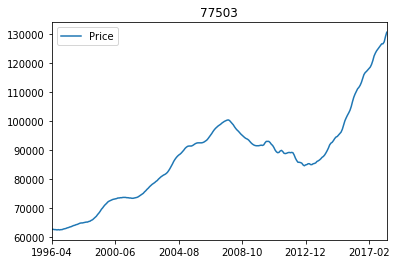

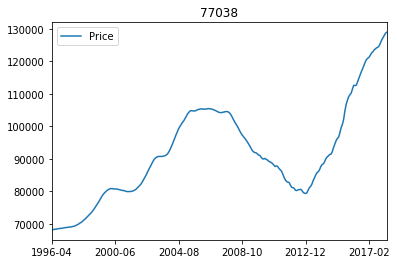

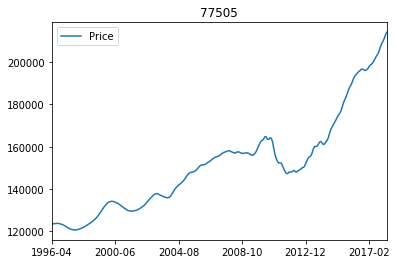

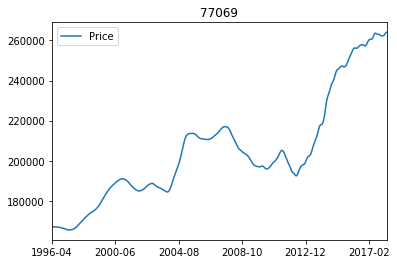

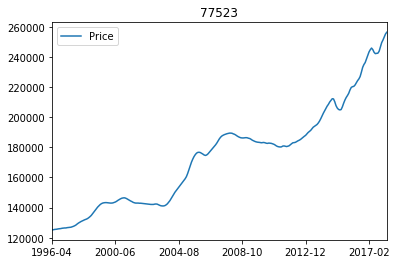

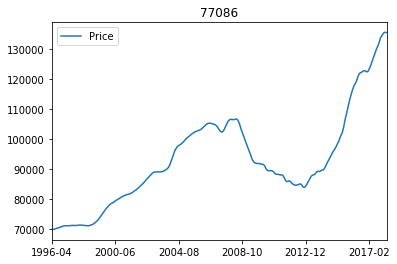

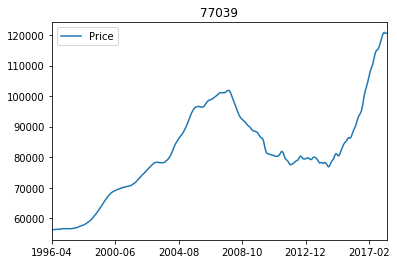

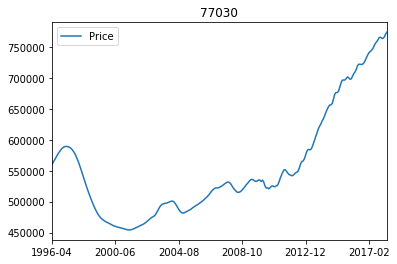

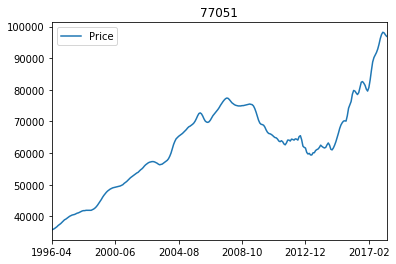

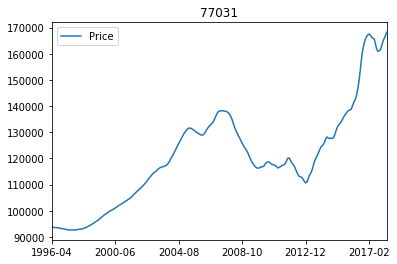

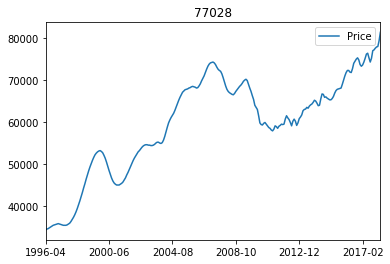

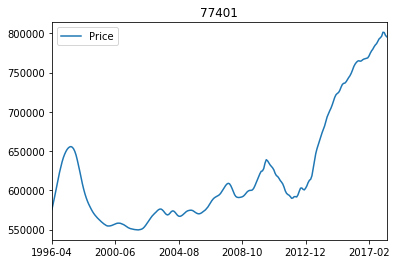

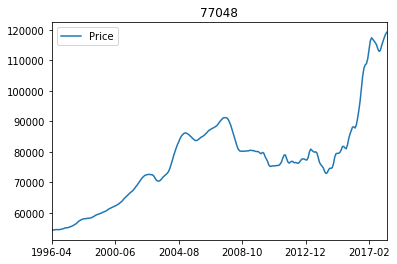

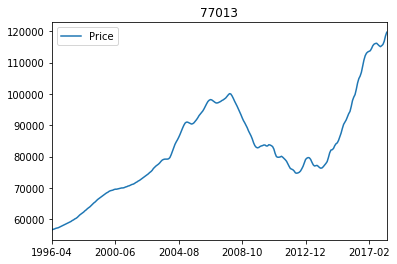

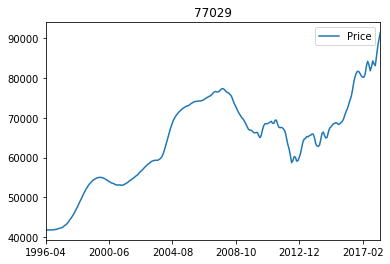

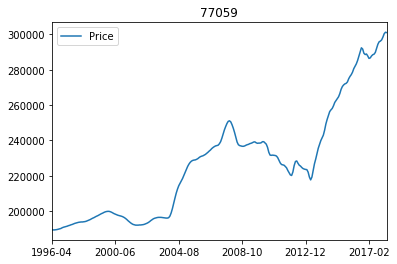

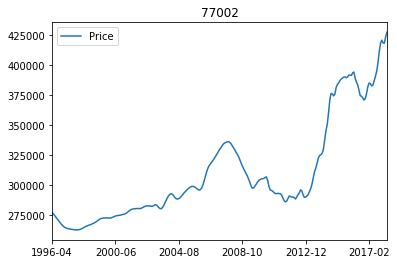

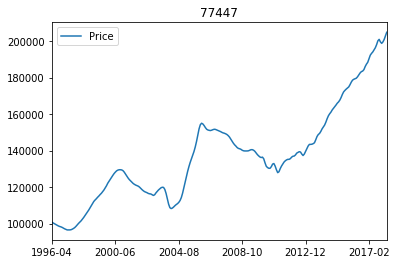

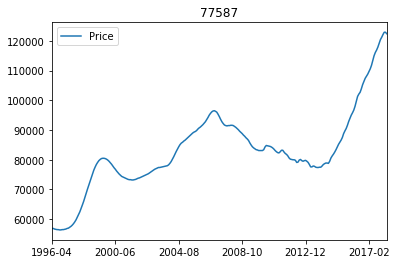

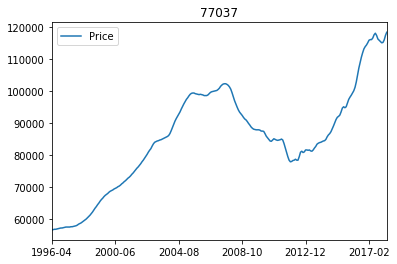

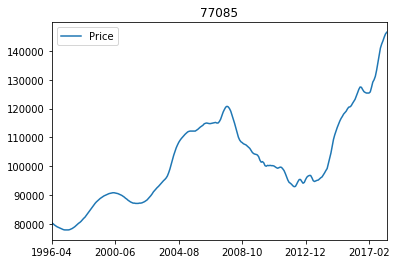

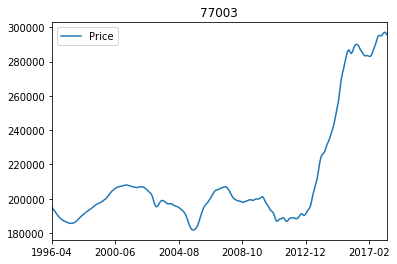

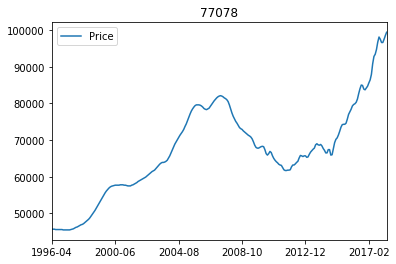

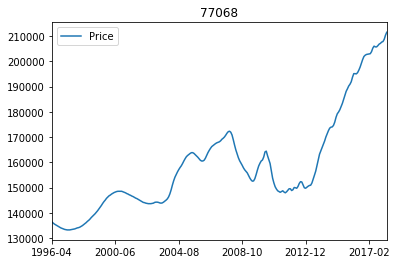

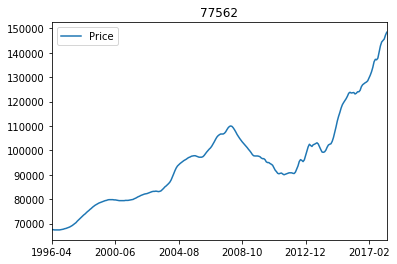

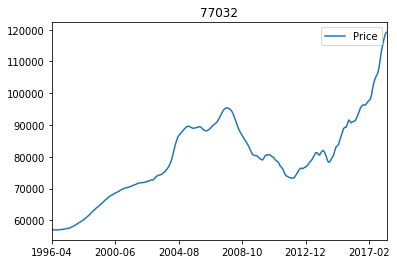

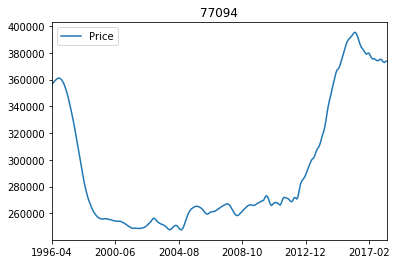

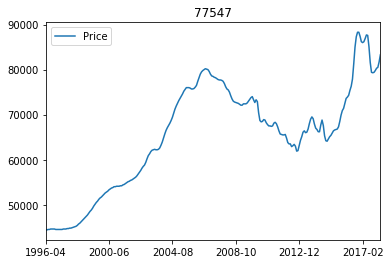

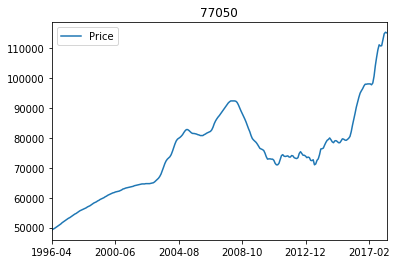

In [9]:
harris = prep_data(df_texas[df_texas['CountyName']=='Harris'], to_drop)

In [61]:
kendall_county_boerne = df_texas[df_texas['City']=='Boerne']
kendall_county_comfort = df_texas[df_texas['City']=='Comfort']
kendall_county_boerne = kendall_county_boerne.drop(['RegionID', 'City', 'State', 'RegionName', 'Metro', 'CountyName', 'SizeRank'],axis=1)
kendall_county_comfort = kendall_county_comfort.drop(['RegionID', 'City', 'State', 'RegionName', 'Metro', 'CountyName', 'SizeRank'],axis=1)
kendall_county_boerne = kendall_county_boerne.melt()
kendall_county_comfort = kendall_county_comfort.melt()
kendall_county_boerne['variable'] = pd.to_datetime(kendall_county_boerne['variable'])
kendall_county_comfort['variable'] = pd.to_datetime(kendall_county_comfort['variable'])
kendall_county_boerne.index = kendall_county_boerne['variable']
kendall_county_comfort.index = kendall_county_comfort['variable']
kendall_county_boerne = kendall_county_boerne.drop(labels=('variable'), axis=1)
kendall_county_comfort = kendall_county_comfort.drop(labels=('variable'), axis=1)
print(kendall_county_boerne.head())
print(kendall_county_comfort.head())

               value
variable            
1996-04-01  196600.0
1996-05-01  196400.0
1996-06-01  196200.0
1996-07-01  196100.0
1996-08-01  195900.0
               value
variable            
1996-04-01  106600.0
1996-05-01  106400.0
1996-06-01  106300.0
1996-07-01  106200.0
1996-08-01  106100.0


In [11]:
print("boerne n/a's :" + str(kendall_county_boerne.isna().sum()))
print("comfort n/a's :" + str(kendall_county_comfort.isna().sum()))

boerne n/a's :value    0
dtype: int64
comfort n/a's :value    0
dtype: int64


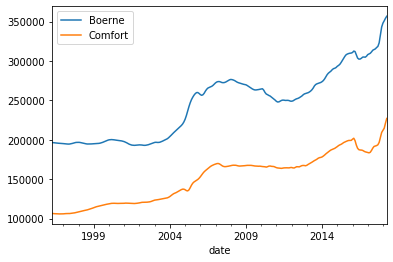

In [12]:
kendall_county_df = pd.DataFrame()
kendall_county_df['date'] = kendall_county_boerne.index
kendall_county_df.index = kendall_county_df['date']
kendall_county_df = kendall_county_df.drop(labels='date', axis=1)
kendall_county_df['Boerne'] = kendall_county_boerne['value']
kendall_county_df['Comfort'] = kendall_county_comfort['value']
kendall_county_df.plot();

ARIMA modeling to account for trend (need to make stationary if going to use ARMA)

In [13]:
def base_model(data):
    import numpy as np
    from statsmodels.tsa.arima_model import ARIMA
    n = len(data)
    base_arima = ARIMA(np.asarray(data), order=(0,1,0)).fit()
    forcast = base_arima.forecast()[0]
    base_arima_aic = base_arima.aic
    base_arima_bic = base_arima.bic
    base_arima_coeff = base_arima.params
    base_arima_pvalues = base_arima.pvalues
#     base_arima_frequncies = print(base_arima.summary().tables[0][1][1])
    base_arima_residuals = base_arima.resid
    base_arima_summary = base_arima.summary()
    return base_arima_coeff, base_arima_pvalues, base_arima_aic, base_arima_bic, base_arima_residuals, base_arima_summary

In [14]:
base_models = []
for i in kerr:
    base_models.append(base_model(i))
base_models

[(array([359.46969697]),
  array([2.8729615e-16]),
  4187.896289995977,
  4195.04818820227,
  array([-359.46969696969694, -259.46969696969694, -259.46969696969694,
         -259.46969696969694, -259.46969696969694, -359.46969696969694,
         -359.46969696969694, -359.46969696969694, -459.46969696969694,
         -359.46969696969694, -459.46969696969694, -459.46969696969694,
         -359.46969696969694, -259.46969696969694, -259.46969696969694,
         -259.46969696969694, -159.46969696969694, -159.46969696969694,
         -159.46969696969694, -59.46969696969694, -59.46969696969694,
         40.53030303030306, 40.53030303030306, 40.53030303030306,
         -59.46969696969694, 40.53030303030306, 40.53030303030306,
         40.53030303030306, -159.46969696969694, -159.46969696969694,
         -259.46969696969694, -259.46969696969694, -259.46969696969694,
         -159.46969696969694, -259.46969696969694, -159.46969696969694,
         -59.46969696969694, 40.53030303030306, 40.53030303

In [15]:
base_models = []
import time
for i in harris:
    base_models.append(base_model(i))
base_models
# print('Took', time.time()-start, 'seconds.')

[(array([452.65151515]),
  array([0.00540782]),
  4909.460365837797,
  4916.61226404409,
  array([1347.348484848485, -452.651515151515, -1952.651515151515,
         -2852.651515151515, -3252.651515151515, -3452.651515151515,
         -3152.651515151515, -1952.651515151515, -1452.651515151515,
         -2352.651515151515, -2852.651515151515, -1652.651515151515,
         -452.651515151515, 747.348484848485, 1747.348484848485,
         2747.348484848485, 3947.348484848485, 4747.348484848485,
         5347.348484848485, 6447.348484848485, 6347.348484848485,
         3847.348484848485, 1147.348484848485, 47.348484848484986,
         -852.651515151515, -652.651515151515, 547.348484848485,
         2647.348484848485, 4947.348484848485, 6947.348484848485,
         7947.348484848485, 8947.348484848484, 8547.348484848484,
         6147.348484848485, 4447.348484848485, 4947.348484848485,
         4847.348484848485, 4647.348484848485, 3847.348484848485,
         2347.348484848485, 447.348484848485

In [62]:
from statsmodels.tsa.arima_model import ARIMA
import time
start = time.time()
n = len(kendall_county_boerne)
arima_model = ARIMA(kendall_county_boerne, order=(0,1,0)).fit()
forecast = arima_model.forecast()[0]
arima_model.summary()
# print('Took', time.time()-start, 'seconds.')

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2313.898
Method:                           css   S.D. of innovations           1549.716
Date:                Mon, 03 Feb 2020   AIC                           4631.796
Time:                        18:10:00   BIC                           4638.948
Sample:                    05-01-1996   HQIC                          4634.670
                         - 04-01-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.8182     95.378      6.362      0.000     419.880     793.756
==============================================================================
"""

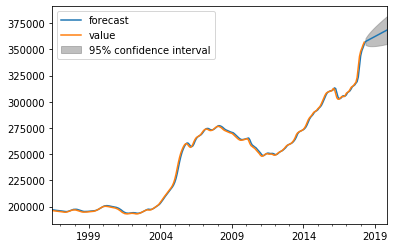

In [17]:
# start = time.time()
arima_model.plot_predict(2,n+18); plt.show()
# print('Took', time.time()-start, 'seconds.')

In [93]:
def pyramid_best_model_output(data):
    from pyramid.arima import auto_arima
    import numpy as np
    arima_best_models = []
    forecast_best_models = []
    arima_best_model_summarys = []
    plots = []
    output = pd.DataFrame()
    model = auto_arima(np.asarray(data), trace=True, error_action='ignore', suppress_warnings=True, seasonal=False, m=52)
    order = model.get_params()['order']
#     results_html = model.summary().tables[0].as_html()
#     results_df = pd.read_html(results_html, header=0, index_col=0)[0]
#     try:
#         if results_df.loc['Model:','D.y']:
#             orders = results_df.loc['Model:','D.y']# need
#         elif results_df.loc['Model:', 'D2.y']:
#             orders = results_df.loc['Model:','D2.y']
#         elif results_df.loc['Model:', 'D3.y']:
#             orders = results_df.loc['Model:','D3.y']
#         elif results_df.loc['Model:', 'D4.y']:
#             orders = results_df.loc['Model:','D4.y']
#         else:
#             orders = results_df.loc['Model:','D5.y']
#     except:
#         print(model.get_params())
#     ar = int(orders.split('(')[1].split(')')[0].split(' ')[0].split(',')[0])
#     difference = int(orders.split('(')[1].split(')')[0].split(' ')[1].split(',')[0])
#     ma = int(orders.split('(')[1].split(')')[0].split(' ')[2])
    arima_best_model = ARIMA(np.asarray(data), order=(order)).fit()
    arima_best_models.append(arima_best_model)
    forecast_best_model = arima_best_model.forecast(steps=60)[0]
    forecast_best_models.append(forecast_best_model)
    arima_best_model_summary = arima_model.summary()
    arima_best_model_summarys.append(arima_best_model_summary)
#     plot = arima_best_model.plot_predict(end=(len(data)+60))
#     plots.append(plot)
    output['arima'] = arima_best_models
    output['forecast'] = forecast_best_models
    output['arima summary'] = arima_best_model_summarys
#     output['forecast_plot'] = plots
#     model_fit = model.fit(data)
#     forecast = model.predict(n_periods=52)
    return output

In [94]:
best_models = []
for i in range(0, len(harris)):
    print(str(i+1) +  ' of ' + str(len(harris)))
    best_models.append(pyramid_best_model_output(harris[i]))
best_models

1 of 121
Fit ARIMA: order=(2, 1, 2); AIC=4181.299, BIC=4202.754, Fit time=0.189 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4909.460, BIC=4916.612, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4369.768, BIC=4380.495, Fit time=0.060 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4597.103, BIC=4607.831, Fit time=0.056 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4189.604, BIC=4207.483, Fit time=0.162 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4183.256, BIC=4208.288, Fit time=0.264 seconds
Fit ARIMA: order=(2, 1, 1); AIC=4202.405, BIC=4220.285, Fit time=0.180 seconds
Fit ARIMA: order=(2, 1, 3); AIC=4183.284, BIC=4208.315, Fit time=0.275 seconds
Fit ARIMA: order=(1, 1, 1); AIC=4224.470, BIC=4238.774, Fit time=0.103 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4184.040, BIC=4212.647, Fit time=0.388 seconds
Total fit time: 1.686 seconds
2 of 121
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=3579.214, BIC=3586.358, Fit time=0.001 seconds
Fit ARIMA: order

Fit ARIMA: order=(5, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(5, 2, 2); AIC=3696.782, BIC=3728.931, Fit time=0.522 seconds
Fit ARIMA: order=(4, 2, 1); AIC=3725.162, BIC=3750.167, Fit time=0.159 seconds
Total fit time: 4.126 seconds
10 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3583.276, BIC=3604.709, Fit time=0.107 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3640.021, BIC=3647.165, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3627.895, BIC=3638.612, Fit time=0.046 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3609.267, BIC=3619.983, Fit time=0.024 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3589.880, BIC=3607.741, Fit time=0.101 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3581.061, BIC=3606.067, Fit time=0.192 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3579.717, BIC=3601.150, Fit time=0.165 seconds
Fit ARIMA: order=(2, 2, 0); AIC=3579.970, BIC=3594.258, Fit time=0.053 seconds
Fit ARIMA: order=(4, 2, 2); AIC=3578.487, BIC=3607.064, Fit time=0.295 seconds
Fit ARIMA: order=(5, 2, 

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


11 of 121
Fit ARIMA: order=(2, 1, 2); AIC=4481.037, BIC=4502.493, Fit time=0.220 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4995.866, BIC=5003.018, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4604.113, BIC=4614.841, Fit time=0.044 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4728.633, BIC=4739.361, Fit time=0.066 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4515.553, BIC=4533.432, Fit time=0.068 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4475.214, BIC=4500.246, Fit time=0.354 seconds
Fit ARIMA: order=(3, 1, 1); AIC=4512.726, BIC=4534.182, Fit time=0.164 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4472.028, BIC=4500.636, Fit time=0.257 seconds
Fit ARIMA: order=(4, 1, 4); AIC=4463.132, BIC=4498.891, Fit time=0.759 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4469.649, BIC=4501.832, Fit time=0.604 seconds
Fit ARIMA: order=(5, 1, 4); AIC=4471.256, BIC=4510.592, Fit time=0.584 seconds
Fit ARIMA: order=(4, 1, 3); AIC=4473.993, BIC=4506.177, Fit time=0.443 seconds
Fit ARIMA: order=(4, 1, 5); AIC=4465.313, 

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


12 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3951.599, BIC=3973.032, Fit time=0.180 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4070.075, BIC=4077.220, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4018.889, BIC=4029.605, Fit time=0.037 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3969.254, BIC=3979.970, Fit time=0.042 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3957.456, BIC=3975.317, Fit time=0.164 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3952.446, BIC=3977.451, Fit time=0.220 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3958.124, BIC=3975.985, Fit time=0.081 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3952.291, BIC=3977.296, Fit time=0.221 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3970.305, BIC=3984.593, Fit time=0.081 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3954.221, BIC=3982.798, Fit time=0.299 seconds
Total fit time: 1.333 seconds
13 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3552.711, BIC=3574.144, Fit time=0.152 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3601.860, BIC=3609.004, Fit time=0.001 seconds
Fi

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


17 of 121
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=3543.194, BIC=3550.339, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3520.042, BIC=3530.759, Fit time=0.031 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3507.828, BIC=3518.545, Fit time=0.028 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3508.028, BIC=3522.317, Fit time=0.064 seconds
Fit ARIMA: order=(0, 2, 2); AIC=3507.518, BIC=3521.807, Fit time=0.051 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 3); AIC=3508.011, BIC=3525.872, Fit time=0.047 seconds
Total fit time: 0.262 seconds
18 of 121
Fit ARIMA: order=(2, 2, 2); AIC=4331.298, BIC=4352.731, Fit time=0.218 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4475.603, BIC=4482.748, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4447.834, BIC=4458.550, Fit time=0.023 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4391.7

Fit ARIMA: order=(1, 2, 5); AIC=3565.865, BIC=3594.442, Fit time=0.287 seconds
Fit ARIMA: order=(0, 2, 5); AIC=3565.204, BIC=3590.210, Fit time=0.189 seconds
Total fit time: 0.801 seconds
25 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3983.190, BIC=4004.623, Fit time=0.172 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4133.646, BIC=4140.791, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4046.019, BIC=4056.735, Fit time=0.035 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4012.201, BIC=4022.918, Fit time=0.036 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3987.398, BIC=4005.258, Fit time=0.144 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3975.813, BIC=4000.818, Fit time=0.218 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3998.008, BIC=4019.440, Fit time=0.135 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3977.655, BIC=4006.232, Fit time=0.261 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4008.480, BIC=4026.341, Fit time=0.111 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3963.389, BIC=3995.538, Fit time=0.344 seconds
Fit ARIMA: o

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


33 of 121
Fit ARIMA: order=(2, 2, 2); AIC=4398.259, BIC=4419.692, Fit time=0.167 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4568.259, BIC=4575.404, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4514.917, BIC=4525.634, Fit time=0.033 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4431.472, BIC=4442.189, Fit time=0.064 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=4400.176, BIC=4425.181, Fit time=0.225 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4413.542, BIC=4431.403, Fit time=0.132 seconds
Fit ARIMA: order=(2, 2, 3); AIC=4400.255, BIC=4425.260, Fit time=0.293 seconds
Fit ARIMA: order=(1, 2, 1); AIC=4431.797, BIC=4446.086, Fit time=0.086 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.029 seconds
34 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3563.832, BIC=3585.265, Fit time=0.120 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3619.069, BIC=3626.214, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0)

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


36 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3854.456, BIC=3875.889, Fit time=0.104 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3968.074, BIC=3975.219, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3935.482, BIC=3946.199, Fit time=0.024 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3876.629, BIC=3887.345, Fit time=0.028 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3860.452, BIC=3878.312, Fit time=0.095 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3846.227, BIC=3871.232, Fit time=0.265 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3854.484, BIC=3875.917, Fit time=0.152 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1); AIC=3852.506, BIC=3870.367, Fit time=0.090 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=3847.355, BIC=3875.932, Fit time=0.280 seconds
Total fit time: 1.066 seconds
37 of 121
Fit ARIMA: order=(2, 2, 2); AIC=4177.288, BIC=4198.721, Fit time=0.229 seconds
Fit ARIMA: order=(0, 2, 0)

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


41 of 121
Fit ARIMA: order=(2, 1, 2); AIC=4068.449, BIC=4089.904, Fit time=0.189 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4732.672, BIC=4739.824, Fit time=0.001 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4184.740, BIC=4195.468, Fit time=0.060 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4422.480, BIC=4433.208, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4055.611, BIC=4073.491, Fit time=0.130 seconds
Fit ARIMA: order=(1, 1, 1); AIC=4069.349, BIC=4083.653, Fit time=0.096 seconds
Fit ARIMA: order=(1, 1, 3); AIC=4040.241, BIC=4061.697, Fit time=0.211 seconds
Fit ARIMA: order=(0, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 4); AIC=4027.921, BIC=4056.528, Fit time=0.328 seconds
Fit ARIMA: order=(1, 1, 4); AIC=4038.107, BIC=4063.138, Fit time=0.327 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4028.011, BIC=4060.194, Fit time=0.446 seconds
Fit ARIMA: order=(2, 1, 3); AIC=4040.511, BIC=4065.543, Fit time=0.243 seconds
Fit ARIMA: order=(2, 1, 5); AIC=4028.323, BIC=4060.507

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


48 of 121
Fit ARIMA: order=(2, 2, 2); AIC=4391.217, BIC=4412.650, Fit time=0.083 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4519.737, BIC=4526.882, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4500.272, BIC=4510.989, Fit time=0.022 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4434.911, BIC=4445.628, Fit time=0.033 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=4356.303, BIC=4381.308, Fit time=0.271 seconds
Fit ARIMA: order=(3, 2, 1); AIC=4391.413, BIC=4412.846, Fit time=0.162 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4343.461, BIC=4372.039, Fit time=0.394 seconds
Fit ARIMA: order=(4, 2, 4); AIC=4342.808, BIC=4378.530, Fit time=0.508 seconds
Fit ARIMA: order=(3, 2, 4); AIC=4341.425, BIC=4373.574, Fit time=0.423 seconds
Fit ARIMA: order=(3, 2, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=4348.555, BIC=4373.560, Fit time=0.353 seconds
Fit ARIMA: order=(4, 2, 5); AIC=4325.315, BIC=4364.608, Fit time=1

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


52 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3507.907, BIC=3529.340, Fit time=0.181 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3551.131, BIC=3558.276, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3539.000, BIC=3549.716, Fit time=0.027 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3535.411, BIC=3546.128, Fit time=0.033 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3534.203, BIC=3552.064, Fit time=0.115 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3507.944, BIC=3532.949, Fit time=0.274 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3537.966, BIC=3555.827, Fit time=0.058 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3508.647, BIC=3533.652, Fit time=0.271 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3537.146, BIC=3551.434, Fit time=0.050 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.027 seconds
53 of 121
Fit ARIMA: order=(2, 2, 2); AIC=4065.944, BIC=4087.377, Fit time=0.234 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4253.251, BIC=4260.396, Fit time=0.001 seconds
Fit ARIMA: ord

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


56 of 121
Fit ARIMA: order=(2, 1, 2); AIC=3753.082, BIC=3774.537, Fit time=0.169 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4103.525, BIC=4110.677, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=3786.064, BIC=3796.792, Fit time=0.036 seconds
Fit ARIMA: order=(0, 1, 1); AIC=3869.528, BIC=3880.255, Fit time=0.038 seconds
Fit ARIMA: order=(1, 1, 2); AIC=3751.636, BIC=3769.516, Fit time=0.108 seconds
Fit ARIMA: order=(1, 1, 1); AIC=3756.985, BIC=3771.289, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 3); AIC=3749.813, BIC=3771.269, Fit time=0.203 seconds
Fit ARIMA: order=(0, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 4); AIC=3738.142, BIC=3766.750, Fit time=0.329 seconds
Fit ARIMA: order=(1, 1, 4); AIC=3736.323, BIC=3761.354, Fit time=0.269 seconds
Fit ARIMA: order=(1, 1, 5); AIC=3736.234, BIC=3764.842, Fit time=0.350 seconds
Fit ARIMA: order=(0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 5); AIC=nan, BIC=nan, Fit time=nan seconds

Fit ARIMA: order=(1, 2, 3); AIC=3655.444, BIC=3676.877, Fit time=0.145 seconds
Fit ARIMA: order=(0, 2, 2); AIC=3673.016, BIC=3687.305, Fit time=0.051 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3650.419, BIC=3678.996, Fit time=0.279 seconds
Fit ARIMA: order=(1, 2, 4); AIC=3657.270, BIC=3682.275, Fit time=0.231 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3641.305, BIC=3673.454, Fit time=0.529 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3649.718, BIC=3678.295, Fit time=0.253 seconds
Fit ARIMA: order=(3, 2, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=3655.550, BIC=3680.555, Fit time=0.234 seconds
Fit ARIMA: order=(4, 2, 5); AIC=3652.841, BIC=3692.134, Fit time=0.898 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3642.933, BIC=3678.654, Fit time=0.673 seconds
Total fit time: 3.629 seconds


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


64 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3610.730, BIC=3632.163, Fit time=0.109 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3688.514, BIC=3695.658, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3673.303, BIC=3684.020, Fit time=0.030 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3637.467, BIC=3648.184, Fit time=0.028 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3620.797, BIC=3638.657, Fit time=0.232 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3608.664, BIC=3633.669, Fit time=0.235 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3612.481, BIC=3633.913, Fit time=0.108 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1); AIC=3611.071, BIC=3628.932, Fit time=0.075 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.930 seconds
65 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3597.623, BIC=3619.056, Fit time=0.146 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3632.2

Fit ARIMA: order=(3, 2, 3); AIC=3728.676, BIC=3757.253, Fit time=0.252 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3730.133, BIC=3765.855, Fit time=0.510 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3730.401, BIC=3755.406, Fit time=0.193 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3730.336, BIC=3762.486, Fit time=0.341 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3728.006, BIC=3760.155, Fit time=0.499 seconds
Fit ARIMA: order=(4, 2, 5); AIC=3732.034, BIC=3771.328, Fit time=0.744 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3727.609, BIC=3756.186, Fit time=0.320 seconds
Fit ARIMA: order=(2, 2, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 3); AIC=3728.405, BIC=3749.838, Fit time=0.114 seconds
Fit ARIMA: order=(3, 2, 5); AIC=3726.666, BIC=3762.387, Fit time=0.615 seconds
Total fit time: 4.456 seconds
72 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3808.852, BIC=3830.284, Fit time=0.187 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3903.926, BIC=3911.070, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 

Fit ARIMA: order=(3, 2, 3); AIC=4314.512, BIC=4343.090, Fit time=0.349 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4332.426, BIC=4350.287, Fit time=0.133 seconds
Fit ARIMA: order=(4, 2, 3); AIC=4316.379, BIC=4348.529, Fit time=0.354 seconds
Fit ARIMA: order=(4, 2, 2); AIC=4314.413, BIC=4342.990, Fit time=0.292 seconds
Total fit time: 1.976 seconds
79 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3549.691, BIC=3571.124, Fit time=0.133 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3588.600, BIC=3595.744, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3572.897, BIC=3583.614, Fit time=0.020 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3564.091, BIC=3574.808, Fit time=0.011 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3549.627, BIC=3567.488, Fit time=0.107 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3565.780, BIC=3580.068, Fit time=0.053 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3547.769, BIC=3569.202, Fit time=0.141 seconds
Fit ARIMA: order=(0, 2, 2); AIC=3565.261, BIC=3579.550, Fit time=0.022 seconds
Fit ARIMA: o

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


82 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3749.331, BIC=3770.764, Fit time=0.122 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3857.162, BIC=3864.307, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3821.835, BIC=3832.551, Fit time=0.016 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3780.821, BIC=3791.537, Fit time=0.026 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3751.846, BIC=3769.707, Fit time=0.097 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3749.962, BIC=3774.967, Fit time=0.193 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3772.030, BIC=3789.891, Fit time=0.122 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3740.450, BIC=3765.455, Fit time=0.180 seconds
Fit ARIMA: order=(3, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 3); AIC=3747.394, BIC=3768.827, Fit time=0.100 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3740.612, BIC=3769.189, Fit time=0.229 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3741.246, BIC=3769.823, Fit time=0.291 seconds
Total fit time: 1.394 seconds


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


83 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3627.186, BIC=3648.619, Fit time=0.165 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3723.296, BIC=3730.440, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3704.100, BIC=3714.817, Fit time=0.012 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3668.461, BIC=3679.177, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3631.776, BIC=3649.637, Fit time=0.094 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3626.951, BIC=3651.956, Fit time=0.231 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3627.986, BIC=3649.419, Fit time=0.141 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3627.095, BIC=3655.673, Fit time=0.237 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3641.534, BIC=3659.395, Fit time=0.095 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=3601.765, BIC=3630.342, Fit time=0.335 seconds
Fit ARIMA: order=(4, 2, 1); AIC=3626.124, BIC=3651.129, Fit time=0.187 seconds
Fit ARIMA: order=(5, 2, 3); AIC=3594.277, BIC=3629.999

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


89 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3773.114, BIC=3794.547, Fit time=0.140 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3893.423, BIC=3900.567, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3862.571, BIC=3873.288, Fit time=0.018 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3817.805, BIC=3828.522, Fit time=0.033 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3791.173, BIC=3809.033, Fit time=0.174 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3777.988, BIC=3802.993, Fit time=0.211 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3790.657, BIC=3808.518, Fit time=0.085 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3757.883, BIC=3782.888, Fit time=0.214 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3753.085, BIC=3785.235, Fit time=0.405 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3757.971, BIC=3786.548, Fit time=0.311 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3754.926, BIC=3790.647, Fit time=0.560 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3752.126, BIC=3780.703, Fit time=0.266 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3752.941, 

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


92 of 121
Fit ARIMA: order=(2, 1, 2); AIC=4038.292, BIC=4059.748, Fit time=0.179 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4340.296, BIC=4347.448, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4115.085, BIC=4125.813, Fit time=0.036 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4113.096, BIC=4123.823, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4030.946, BIC=4048.825, Fit time=0.181 seconds
Fit ARIMA: order=(1, 1, 1); AIC=4041.428, BIC=4055.732, Fit time=0.108 seconds
Fit ARIMA: order=(1, 1, 3); AIC=4024.514, BIC=4045.970, Fit time=0.174 seconds
Fit ARIMA: order=(0, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 4); AIC=4006.777, BIC=4035.385, Fit time=0.516 seconds
Fit ARIMA: order=(1, 1, 4); AIC=4009.290, BIC=4034.321, Fit time=0.333 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4007.451, BIC=4039.634, Fit time=0.357 seconds
Fit ARIMA: order=(2, 1, 3); AIC=4009.611, BIC=4034.643, Fit time=0.259 seconds
Fit ARIMA: order=(2, 1, 5); AIC=4006.694, BIC=4038.878

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


98 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3545.778, BIC=3567.211, Fit time=0.137 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3585.761, BIC=3592.905, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3566.307, BIC=3577.023, Fit time=0.026 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3553.818, BIC=3564.534, Fit time=0.023 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3543.926, BIC=3561.787, Fit time=0.119 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3554.879, BIC=3569.168, Fit time=0.059 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3545.940, BIC=3567.373, Fit time=0.152 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=3554.101, BIC=3568.390, Fit time=0.041 seconds
Total fit time: 0.575 seconds
99 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3709.472, BIC=3730.905, Fit time=0.166 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3804.145, BIC=3811.289, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3796.721, BIC=3807.438, Fit time=0.027 seconds
Fit ARIMA: ord

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


101 of 121
Fit ARIMA: order=(2, 1, 2); AIC=3871.067, BIC=3892.523, Fit time=0.185 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4175.896, BIC=4183.048, Fit time=0.001 seconds
Fit ARIMA: order=(1, 1, 0); AIC=3953.565, BIC=3964.293, Fit time=0.032 seconds
Fit ARIMA: order=(0, 1, 1); AIC=3955.560, BIC=3966.288, Fit time=0.049 seconds
Fit ARIMA: order=(1, 1, 2); AIC=3878.183, BIC=3896.062, Fit time=0.119 seconds
Fit ARIMA: order=(3, 1, 2); AIC=3863.471, BIC=3888.502, Fit time=0.211 seconds
Fit ARIMA: order=(3, 1, 1); AIC=3885.360, BIC=3906.815, Fit time=0.132 seconds
Fit ARIMA: order=(3, 1, 3); AIC=3865.238, BIC=3893.845, Fit time=0.278 seconds
Fit ARIMA: order=(2, 1, 1); AIC=3887.847, BIC=3905.726, Fit time=0.118 seconds
Fit ARIMA: order=(4, 1, 3); AIC=3865.855, BIC=3898.039, Fit time=0.365 seconds
Fit ARIMA: order=(4, 1, 2); AIC=3865.153, BIC=3893.760, Fit time=0.266 seconds
Total fit time: 1.761 seconds
102 of 121
Fit ARIMA: order=(2, 1, 2); AIC=3754.709, BIC=3776.165, Fit time=0.167 seconds


Fit ARIMA: order=(4, 2, 5); AIC=3935.404, BIC=3974.698, Fit time=0.537 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3954.196, BIC=3986.346, Fit time=0.448 seconds
Fit ARIMA: order=(5, 2, 5); AIC=3937.255, BIC=3980.121, Fit time=0.883 seconds
Total fit time: 4.685 seconds


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


109 of 121
Fit ARIMA: order=(2, 2, 2); AIC=4434.950, BIC=4456.383, Fit time=0.168 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4554.740, BIC=4561.884, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4540.801, BIC=4551.517, Fit time=0.041 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4482.585, BIC=4493.302, Fit time=0.014 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4436.196, BIC=4454.057, Fit time=0.093 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4422.883, BIC=4447.888, Fit time=0.223 seconds
Fit ARIMA: order=(3, 2, 1); AIC=4442.979, BIC=4464.412, Fit time=0.075 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4388.351, BIC=4416.928, Fit time=0.375 seconds
Fit ARIMA: order=(4, 2, 4); AIC=4389.807, BIC=4425.528, Fit time=0.618 seconds
Fit ARIMA: order=(2, 2, 3); AIC=4394.014, BIC=4419.019, Fit time=0.340 seconds
Fit ARIMA: order=(4, 2, 3); AIC=4390.170, BIC=4422.319, Fit time=0.481 seconds
Fit ARIMA: order=(3, 2, 4); AIC=4389.281, BIC=4421.430, Fit time=0.601 seconds
Total fit time: 3.034 seconds


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


110 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3861.110, BIC=3882.543, Fit time=0.148 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4006.711, BIC=4013.855, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3950.918, BIC=3961.634, Fit time=0.018 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3888.368, BIC=3899.084, Fit time=0.034 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3869.931, BIC=3887.792, Fit time=0.113 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3857.953, BIC=3882.958, Fit time=0.164 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3874.369, BIC=3895.802, Fit time=0.096 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3847.682, BIC=3876.260, Fit time=0.222 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3836.558, BIC=3872.280, Fit time=0.470 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3846.334, BIC=3878.484, Fit time=0.371 seconds
Fit ARIMA: order=(5, 2, 4); AIC=3838.470, BIC=3877.764, Fit time=0.575 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3835.712, BIC=3867.861, Fit time=0.365 seconds
Fit ARIMA: order=(5, 2, 3); AIC=3836.910,

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


115 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3753.040, BIC=3774.473, Fit time=0.133 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3884.210, BIC=3891.355, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3876.782, BIC=3887.498, Fit time=0.013 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3826.080, BIC=3836.796, Fit time=0.027 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3758.365, BIC=3776.226, Fit time=0.085 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3748.659, BIC=3773.664, Fit time=0.196 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3763.399, BIC=3784.832, Fit time=0.198 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3750.259, BIC=3778.837, Fit time=0.241 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3765.986, BIC=3783.846, Fit time=0.070 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3750.209, BIC=3782.358, Fit time=0.357 seconds
Fit ARIMA: order=(4, 2, 2); AIC=3750.085, BIC=3778.662, Fit time=0.250 seconds
Total fit time: 1.577 seconds
116 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3820.755, BIC=3842.188, Fit time=0.114 seconds


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


119 of 121
Fit ARIMA: order=(2, 2, 2); AIC=4061.525, BIC=4082.958, Fit time=0.174 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4215.004, BIC=4222.148, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4176.783, BIC=4187.500, Fit time=0.032 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4125.184, BIC=4135.900, Fit time=0.034 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4074.127, BIC=4091.988, Fit time=0.153 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4042.343, BIC=4067.348, Fit time=0.182 seconds
Fit ARIMA: order=(3, 2, 1); AIC=4074.605, BIC=4096.038, Fit time=0.152 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4042.863, BIC=4071.440, Fit time=0.274 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4072.896, BIC=4090.757, Fit time=0.078 seconds
Fit ARIMA: order=(4, 2, 3); AIC=4039.430, BIC=4071.580, Fit time=0.353 seconds
Fit ARIMA: order=(5, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=4042.692, BIC=4071.269, Fit time=0.278 seconds
Fit ARIMA: order=(4, 2, 4); AIC=nan, BIC=nan, Fit tim

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


121 of 121
Fit ARIMA: order=(2, 2, 2); AIC=3909.665, BIC=3931.098, Fit time=0.158 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3972.049, BIC=3979.194, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3971.938, BIC=3982.654, Fit time=0.029 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3963.099, BIC=3973.815, Fit time=0.033 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3907.707, BIC=3925.568, Fit time=0.140 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3949.293, BIC=3963.582, Fit time=0.100 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3881.452, BIC=3902.885, Fit time=0.167 seconds
Fit ARIMA: order=(0, 2, 2); AIC=3918.161, BIC=3932.449, Fit time=0.052 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3879.719, BIC=3908.297, Fit time=0.314 seconds
Fit ARIMA: order=(1, 2, 4); AIC=3883.261, BIC=3908.266, Fit time=0.291 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3876.795, BIC=3908.944, Fit time=0.443 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3878.772, BIC=3907.349, Fit time=0.287 seconds
Fit ARIMA: order=(3, 2, 5); AIC=3861.055,

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


[                                               arima  \
 0  <statsmodels.tsa.arima_model.ARIMAResultsWrapp...   
 
                                             forecast  \
 0  [330965.0181771703, 331546.88698580064, 332256...   
 
                                        arima summary  
 0                               ARIMA Model Resul...  ,
                                                arima  \
 0  <statsmodels.tsa.arima_model.ARIMAResultsWrapp...   
 
                                             forecast  \
 0  [165084.4463478472, 165870.98149818485, 166659...   
 
                                        arima summary  
 0                               ARIMA Model Resul...  ,
                                                arima  \
 0  <statsmodels.tsa.arima_model.ARIMAResultsWrapp...   
 
                                             forecast  \
 0  [176673.66883581065, 176972.47448808275, 17713...   
 
                                        arima summary  
 0                    

In [63]:
from pyramid.arima import auto_arima
start = time.time()
model = auto_arima(kendall_county_boerne, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False, m=52)
model.fit(kendall_county_boerne)
forecast = model.predict(n_periods=52)
# print('Took', time.time()-start, 'seconds.')

Fit ARIMA: order=(2, 2, 2); AIC=4065.434, BIC=4086.866, Fit time=0.165 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4250.509, BIC=4257.653, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4209.057, BIC=4219.773, Fit time=0.013 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4132.942, BIC=4143.658, Fit time=0.042 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4090.370, BIC=4108.230, Fit time=0.144 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4064.973, BIC=4089.978, Fit time=0.229 seconds
Fit ARIMA: order=(3, 2, 1); AIC=4101.209, BIC=4122.642, Fit time=0.130 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4044.668, BIC=4073.246, Fit time=0.236 seconds
Fit ARIMA: order=(4, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=4046.966, BIC=4071.971, Fit time=0.199 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 4); AIC=4046.668, BIC=4078.817, Fit time=0.404 seconds
Total fit time: 1.808 seconds


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [64]:

orders = model.get_params()['order']
arima_model = ARIMA(kendall_county_boerne, order=(orders)).fit()
forecast = arima_model.forecast(steps=60)[0]
forecast
# arima_model.summary()

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


array([358819.00501603, 360915.81927566, 362869.89619934, 364638.81779783,
       366354.15023415, 368017.4543138 , 369620.31227761, 371189.21880898,
       372734.9003586 , 374259.78086181, 375770.85971474, 377273.32675557,
       378769.80061586, 380262.91797064, 381754.90154023, 383247.22919096,
       384741.08841173, 386237.45559888, 387737.05425698, 389240.44184579,
       390748.0616751 , 392260.25420782, 393777.28139572, 395299.34804283,
       396826.6128652 , 398359.19844099, 399897.20000622, 401440.69145886,
       402989.73000959, 404544.3600273 , 406104.61593004, 407670.52439093,
       409242.10608835, 410819.37705799, 412402.34973122, 413991.0337454 ,
       415585.43657293, 417185.56400714, 418791.42053944, 420403.00965206,
       422020.33404482, 423643.39581083, 425272.19657292, 426906.73758923,
       428547.01983522, 430193.04406716, 431844.81087138, 433502.32070246,
       435165.57391284, 436834.57077577, 438509.31150308, 440189.79625904,
       441876.02517096, 4

In [69]:
start = time.time()
test_period = 2*12
arima_model = ARIMA(kendall_county_boerne, order=(3,2,3)).fit()
forecast = arima_model.forecast()[0]
arima_forecast = model.predict(n_periods=test_period)
arima_forecast
# print('Took', time.time()-start, 'seconds.')

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


array([358819.00501603, 360915.81927566, 362869.89619934, 364638.81779783,
       366354.15023415, 368017.4543138 , 369620.31227761, 371189.21880898,
       372734.9003586 , 374259.78086181, 375770.85971474, 377273.32675557,
       378769.80061586, 380262.91797064, 381754.90154023, 383247.22919096,
       384741.08841173, 386237.45559888, 387737.05425698, 389240.44184579,
       390748.0616751 , 392260.25420782, 393777.28139572, 395299.34804283])

In [81]:
harris[0]

,Price
1996-04,210400
1996-05,212200
1996-06,212200
1996-07,210700
1996-08,208300
...,...
2017-12,321200
2018-01,321200
2018-02,323000
2018-03,326900


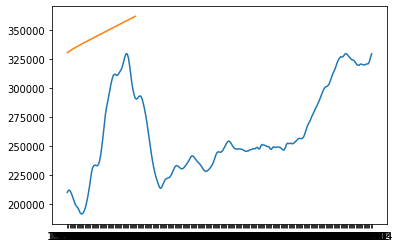

In [83]:
plt.plot(harris[0])
plt.plot(best_models[0]['forecast'][0], )

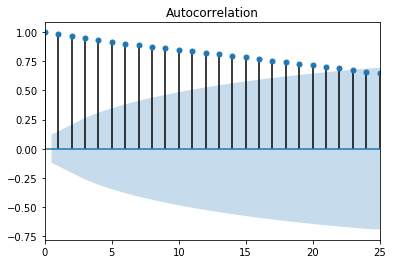

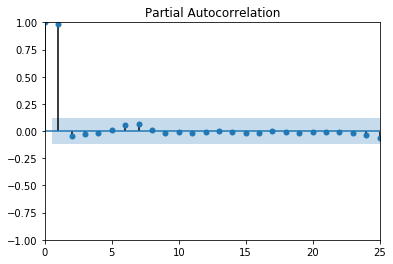

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
start = time.time()
plot_acf(kendall_county_boerne); plt.xlim(0,25); plt.show()
plot_pacf(kendall_county_boerne); plt.xlim(0,25); plt.ylim(-1,1);plt.show()
# print('Took', time.time()-start, 'seconds.')

Data is already random walk

In [42]:
## Add year and month features
import numpy as np

start = time.time()
kendall_county_boerne['Year'] = kendall_county_boerne.index.year - np.min(kendall_county_boerne.index.year)
kendall_county_boerne['Month'] = kendall_county_boerne.index.month
date_features = ['Year', 'Month']
## Add polynomials of datetime components
polynomial_terms = [2,3]
for feature in date_features:
    for i in polynomial_terms:
        kendall_county_boerne[feature+'**'+str(i)] = kendall_county_boerne[feature]**i
## Add previous values and polynomial terms of previous values
previous_values_range = 10*12
for i in range(1,previous_values_range):
    kendall_county_boerne['Previous'+str(i)] = kendall_county_boerne['value'].shift(i).bfill()
    for j in polynomial_terms:
        kendall_county_boerne['Previous'+str(i)+'**'+str(j)] = (kendall_county_boerne['value'].shift(i).bfill())**j
kendall_county_boerne.head()
# print('Took', time.time()-start, 'seconds.')

,value,Year,Month,Year**2,Year**3,Month**2,Month**3,Previous1,Previous1**2,Previous1**3,...,Previous116**3,Previous117,Previous117**2,Previous117**3,Previous118,Previous118**2,Previous118**3,Previous119,Previous119**2,Previous119**3
variable,,,,,,,,,,,,,,,,,,,,,
1996-04-01,196600.0,0,4,0,0,16,64,196600.0,3.865156e+10,7.598897e+15,...,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15
1996-05-01,196400.0,0,5,0,0,25,125,196600.0,3.865156e+10,7.598897e+15,...,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15
1996-06-01,196200.0,0,6,0,0,36,216,196400.0,3.857296e+10,7.575729e+15,...,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15
1996-07-01,196100.0,0,7,0,0,49,343,196200.0,3.849444e+10,7.552609e+15,...,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15
1996-08-01,195900.0,0,8,0,0,64,512,196100.0,3.845521e+10,7.541067e+15,...,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15,196600.0,3.865156e+10,7.598897e+15


In [43]:
## fit lasso regression
start = time.time()
from sklearn.linear_model import LassoLarsCV #lowest angle regression #cv cross validation
reg = LassoLarsCV(cv=10).fit(kendall_county_boerne.drop('value',axis=1)[:-test_period], kendall_county_boerne['value'][:-test_period])
# print('Took', time.time()-start, 'seconds.')

In [44]:
## view features selected
start = time.time()
selected_features = pd.DataFrame()
selected_features['Feature'] = kendall_county_boerne.drop('value',axis=1).columns[reg.coef_>0]
selected_features['Coefficient'] = reg.coef_[reg.coef_>0]
selected_features
# print('Took', time.time()-start, 'seconds.')

,Feature,Coefficient
0,Month,1.325410e+01
1,Year**2,1.105981e+01
2,Previous1,1.238331e+00
3,Previous13**3,7.343644e-14
4,Previous14**3,8.878764e-15
5,Previous26,5.809416e-03
6,Previous50,2.007944e-03
7,Previous83,1.109768e-02
8,Previous106**3,6.887299e-14
9,Previous115**3,1.994944e-14


In [45]:
# check out offsets library for additional features

In [46]:
## create and populate forecast dataframe
start = time.time()
forecast_df = kendall_county_boerne.copy()
for datetime, date in zip(kendall_county_boerne.index[-test_period:], range(len(kendall_county_boerne)-test_period, len(kendall_county_boerne))):
    values = []
    ## add datetime components
    values.append(datetime.year - np.min(kendall_county_boerne.index.year))
    values.append(datetime.month)
    ## add polynomial terms of datetime components
    for feature in date_features:
        for i in polynomial_terms:
            values.append((forecast_df[feature][date])**i)
    ## add previous values and polynomial terms of previous values
    for i in range(1,previous_values_range):
        values.append(forecast_df['value'][date-i])
        for j in polynomial_terms:
            values.append((forecast_df['value'][date-i])**j)
    ## make prediction on current datetime
    forecast = reg.predict(np.array(values).reshape(1,-1))
    ## append prediction to start of values array
    values.insert(0, forecast[0])
    ## set forecast row in dataframe
    forecast_df.loc[datetime] = values
# print('Took', time.time()-start, 'seconds.')

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
start = time.time()
print('ARIMA RMSE:', sqrt(mean_squared_error(kendall_county_boerne['value'][-test_period:], arima_forecast)))
print('Regression RMSE:', sqrt(mean_squared_error(kendall_county_boerne['value'][-test_period:], forecast_df['value'][-test_period:])))
# print('Took', time.time()-start, 'seconds.')

ARIMA RMSE: 59339.27439882028
Regression RMSE: 20724.340004038517


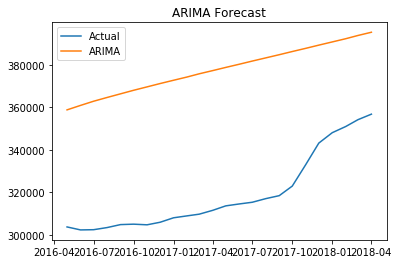

In [48]:
plt.plot(kendall_county_boerne.index[-test_period:], kendall_county_boerne['value'][-test_period:])
plt.plot(kendall_county_boerne.index[-test_period:], arima_forecast)
plt.title('ARIMA Forecast')
plt.legend(['Actual', 'ARIMA'])

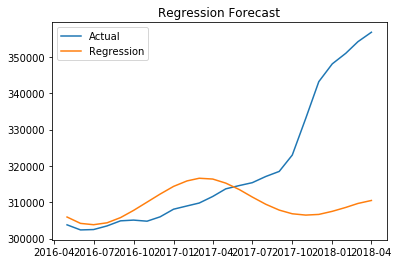

In [49]:
plt.plot(kendall_county_boerne.index[-test_period:], kendall_county_boerne['value'][-test_period:])
plt.plot(kendall_county_boerne.index[-test_period:], forecast_df['value'][-test_period:])
plt.title('Regression Forecast')
plt.legend(['Actual', 'Regression'])

Text(0.5, 1.0, 'ARIMA Residuals')

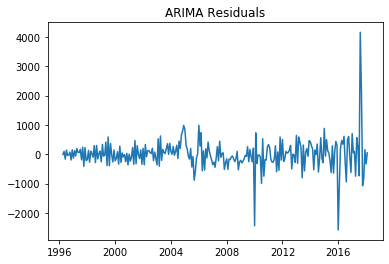

In [50]:
plt.plot(kendall_county_boerne.index[:-2], model.resid())
plt.title('ARIMA Residuals')

# Step 2: Data Preprocessing

In [51]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [52]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results

In [ ]:
# write function that will ask user to input state then county then run model on selected criteria

In [ ]:
# References
# https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe